In [61]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import patches
from scipy.spatial import ConvexHull
import seaborn as sns
import datetime
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings; warnings.filterwarnings(action='once')

damage = pd.read_csv('https://raw.githubusercontent.com/labs13-quake-viewer/ds-data/danielle-romanoff/final_damage.csv')
damage.columns

Index(['Tsunami', 'Name', 'Latitude', 'Longitude', 'Depth', 'Magnitude',
       'Date', 'Deaths', 'Missing', 'Injuries', 'Damage', 'Houses Destroyed',
       'Houses Damaged'],
      dtype='object')

In [62]:
damage['Date'] = pd.to_datetime(damage['Date'])
damage.head()

,Tsunami,Name,Latitude,Longitude,Depth,Magnitude,Date,Deaths,Missing,Injuries,Damage,Houses Destroyed,Houses Damaged
0,1.0,"PERU: LIMA,SALINAS-HUAURA,LIMA,CALLAO,CHANCAY",-9.0,-79.0,40.0,8.4,1678-06-18,1000.0,0.0,0.0,12500000.0,1000.0,0.0
1,1.0,PERU: LIMA,-13.5,-76.5,30.0,8.5,1687-10-20,10000.0,0.0,0.0,12500000.0,0.0,0.0
2,0.0,RUSSIA: TERSK,43.7,44.7,15.0,5.3,1688-01-01,0.0,0.0,0.0,2500000.0,0.0,0.0
3,0.0,ECUADOR: TIXAN,-2.2,-78.9,5.0,6.8,1689-03-01,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,BALKANS NW: SLOVENIA: LJUBLJANA,45.6,15.3,6.0,5.0,1699-02-11,100.0,0.0,0.0,12500000.0,0.0,0.0


In [63]:
# Normalize each column
# damage["Magnitude"]=((damage["Magnitude"]-damage["Magnitude"].min())/(damage["Magnitude"].max()-damage["Magnitude"].min()))*20
damage["Depth"]=((damage["Depth"]-damage["Depth"].min())/(damage["Depth"].max()-damage["Depth"].min()))*20
damage["Deaths"]=((damage["Deaths"]-damage["Deaths"].min())/(damage["Deaths"].max()-damage["Deaths"].min()))*20
damage["Missing"]=((damage["Missing"]-damage["Missing"].min())/(damage["Missing"].max()-damage["Missing"].min()))*20
damage["Injuries"]=((damage["Injuries"]-damage["Injuries"].min())/(damage["Injuries"].max()-damage["Injuries"].min()))*20
damage["Damage"]=((damage["Damage"]-damage["Damage"].min())/(damage["Damage"].max()-damage["Damage"].min()))*20
damage["Houses Destroyed"]=((damage["Houses Destroyed"]-damage["Houses Destroyed"].min())/(damage["Houses Destroyed"].max()-damage["Houses Destroyed"].min()))*20
damage["Houses Damaged"]=((damage["Houses Damaged"]-damage["Houses Damaged"].min())/(damage["Houses Damaged"].max()-damage["Houses Damaged"].min()))*20
damage.head()

,Tsunami,Name,Latitude,Longitude,Depth,Magnitude,Date,Deaths,Missing,Injuries,Damage,Houses Destroyed,Houses Damaged
0,1.0,"PERU: LIMA,SALINAS-HUAURA,LIMA,CALLAO,CHANCAY",-9.0,-79.0,1.204819,8.4,1678-06-18,0.080720,0.0,0.0,9.057971,0.003728,0.0
1,1.0,PERU: LIMA,-13.5,-76.5,0.903614,8.5,1687-10-20,0.807203,0.0,0.0,9.057971,0.000000,0.0
2,0.0,RUSSIA: TERSK,43.7,44.7,0.451807,5.3,1688-01-01,0.000000,0.0,0.0,1.811594,0.000000,0.0
3,0.0,ECUADOR: TIXAN,-2.2,-78.9,0.150602,6.8,1689-03-01,0.000000,0.0,0.0,0.000000,0.000000,0.0
4,0.0,BALKANS NW: SLOVENIA: LJUBLJANA,45.6,15.3,0.180723,5.0,1699-02-11,0.008072,0.0,0.0,9.057971,0.000000,0.0


In [0]:
damage.sort_values(['Magnitude'], ascending=True)

In [0]:
X = damage.drop(['Name', 'Date'], axis=1)
Y = damage['Name']

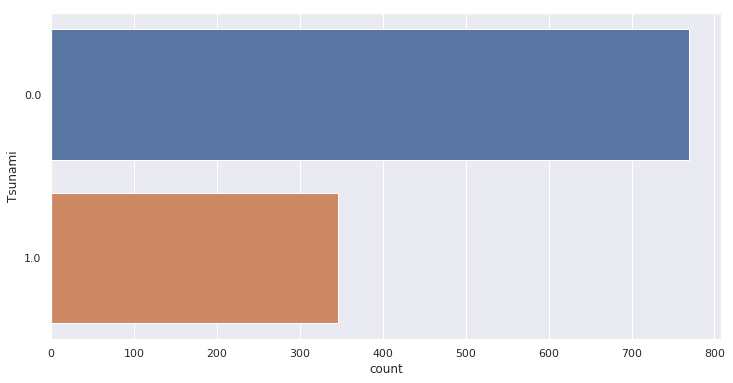

In [66]:
# Showing how many earthquakes caused a Tsunami

sns.countplot(y="Tsunami", data=X)
plt.show()

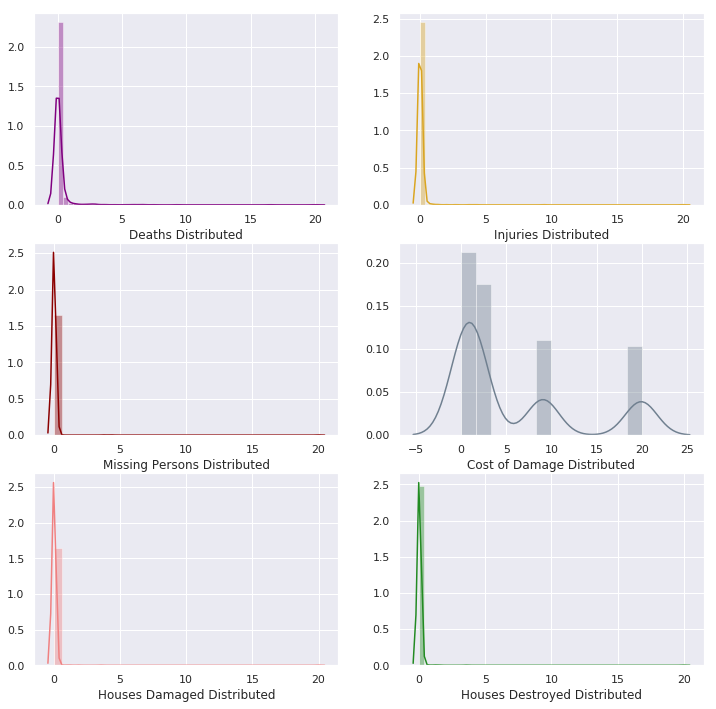

In [36]:
sns.set(style='darkgrid')

f, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=False)

sns.distplot(a = X.Deaths, bins= None, hist=True, kde=True, color = 'purple',  axlabel='Deaths Distributed', ax=axes[0, 0])

sns.distplot(a = X.Injuries, bins= None, hist=True, kde=True, color = 'goldenrod',  axlabel='Injuries Distributed', ax=axes[0, 1])

sns.distplot(a = X.Missing, bins= None, hist=True, kde=True, color = 'darkred', axlabel='Missing Persons Distributed', ax=axes[1, 0])

sns.distplot(a = X.Damage, bins= None, hist=True, kde=True, color = 'slategrey', axlabel='Cost of Damage Distributed', ax=axes[1, 1])

sns.distplot(a = X['Houses Destroyed'], bins= None, hist=True, kde=True, color = 'forestgreen', axlabel='Houses Destroyed Distributed', ax=axes[2, 1])

sns.distplot(a = X['Houses Damaged'], bins= None, hist=True, kde=True, color = 'lightcoral', axlabel='Houses Damaged Distributed', ax=axes[2, 0])

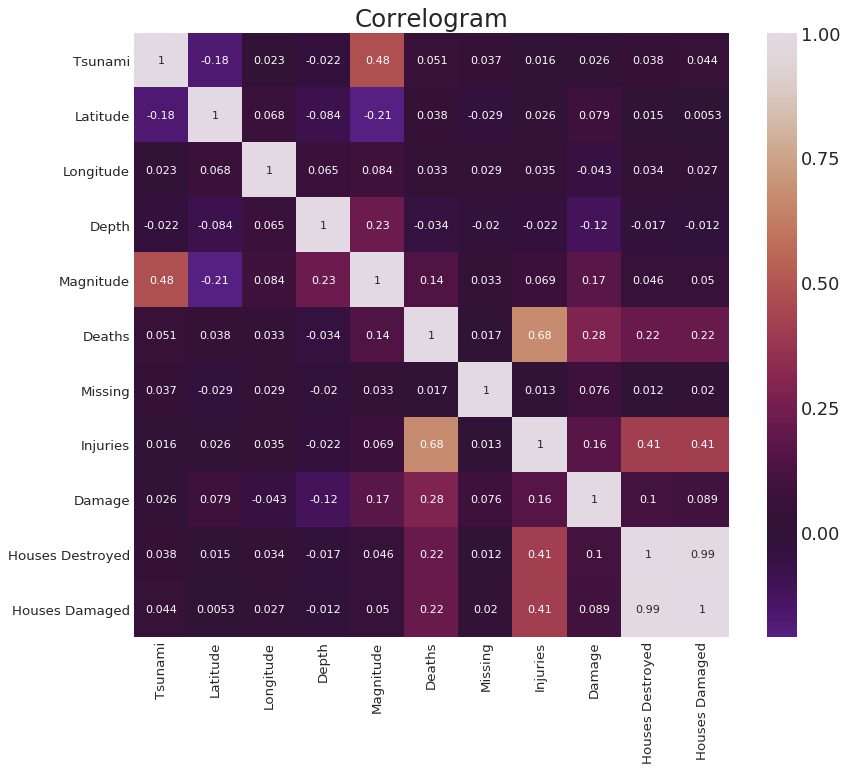

In [66]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(X.corr(), xticklabels=X.corr().columns, yticklabels=X.corr().columns, cmap='twilight', center=0, annot=True)

# Decorations
plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

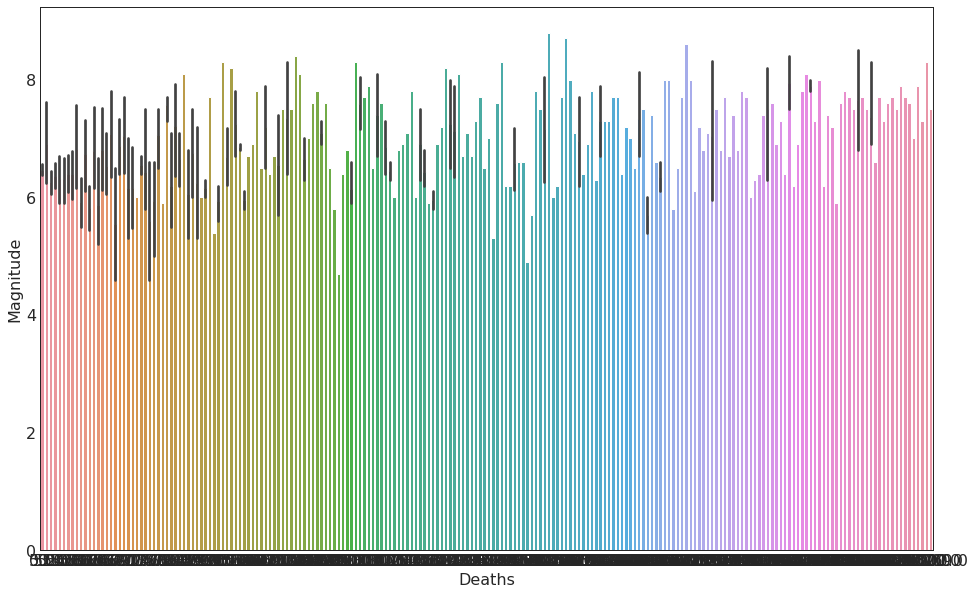

In [67]:
sns.barplot(x='Deaths', y='Magnitude', data=X)

In [0]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

In [0]:
# As many colors as there are unique Magnitudes
magnitudes = np.unique(X['Magnitude'])
colors = [plt.cm.tab10(i/float(len(magnitudes)-1)) for i in range(len(magnitudes))]

/usr/local/lib/python3.6/dist-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


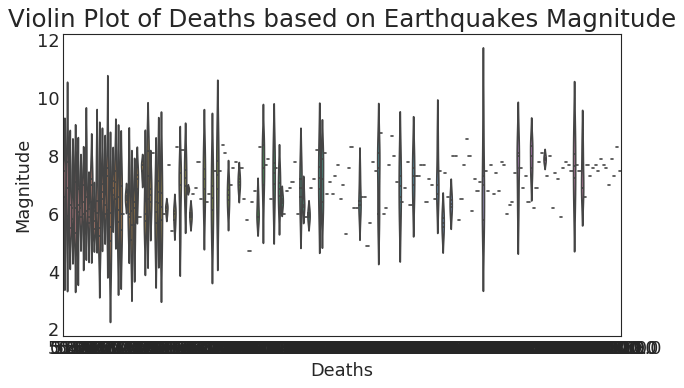

In [70]:
# Draw Plot
plt.figure(figsize=(9, 5), dpi= 80)
sns.violinplot(x='Deaths', y='Magnitude', data=X, scale='width', inner='quartile')

# Decoration
plt.title('Violin Plot of Deaths based on Earthquakes Magnitude', fontsize=22)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


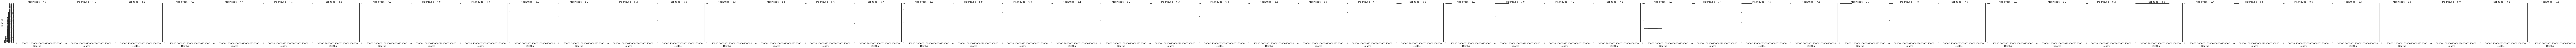

In [72]:
# Plot
sns.catplot(x="Deaths", y="Injuries",
            hue="Magnitude", col="Magnitude",
            data=X,
            orient="h", height=5, aspect=1, palette="tab10",
            kind="violin", dodge=True, cut=0, bw=.2)